In [1]:
%pip install numpy
%pip install opencv-python
%pip install scipy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pathlib

import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

In [3]:
# declare prewitt kernel
_PREWITT_X_KERNEL = np.array([
    [-1, 0 ,1],
    [-1, 0, 1],
    [-1, 0, 1]
])

_PREWITT_Y_KERNEL = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

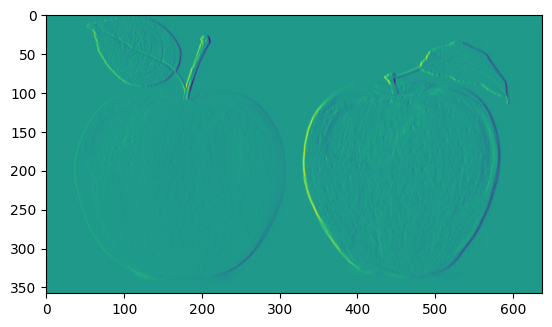

In [6]:

image_path = pathlib.Path('./assets/apel.jpg')

# image is in BGR
image_matrix = cv2.imread(str(image_path))

# image in RGB
image_matrix_rgb = cv2.cvtColor(image_matrix, cv2.COLOR_BGR2RGB)


grayscale_image = cv2.cvtColor(image_matrix, cv2.COLOR_BGR2GRAY)


cv2.imshow('Apple', image_matrix)
cv2.imshow('grayscale', grayscale_image)
# plt.imshow(image_matrix_rgb)

# function ref: https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

# search the edge based on axis (the axis corresspond with kernel axis)
convolved_image_x = convolve2D(grayscale_image, _PREWITT_X_KERNEL)
convolved_image_y = convolve2D(grayscale_image, _PREWITT_Y_KERNEL)

convolved_image_magnitude = np.sqrt((convolved_image_y ** 2) + (convolved_image_x ** 2))


# print(convolved_image)
# plt.imshow(convolved_image_x)
cv2.imshow('convolved image (x)', convolved_image_x)
cv2.imshow('convolved image (y)', convolved_image_y)
cv2.imshow('convolved image', convolved_image_x + convolved_image_y)


cv2.waitKey(0)
cv2.destroyAllWindows()